In [ ]:
# Instalowanie bibliotek, "!" ozacza wykonanie komendy w terminalu a nie w Pythonie:

!apt update && apt install xvfb
!pip install gym-notebook-wrapper
!pip install cmake
!pip install swig
!pip install gym[classic_control]==0.25.2
!pip install gym[box2d]==0.25.2
!pip install opencv-python-headless
!pip install stable-baselines3==2.1.0
!pip install pyglet==1.5.27

In [ ]:
# Uczenie agenta opartego o algorytm A2C dla środowiska "CartPole-v1"

import gym
from stable_baselines3 import A2C
from stable_baselines3.common.env_util import make_vec_env

env = make_vec_env("CartPole-v1", n_envs=10) # gym.make("CartPole-v1") dla przypadku pojedynczego środowiska

model = A2C("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=100000, log_interval=10)
# model.save("A2C_cartpole_model")

In [ ]:
# wykorzystanie wrapera do łatwiejszej wizualizacji działana nauczonego agenta:

import gnwrapper

env = gnwrapper.Monitor(gym.make("CartPole-v1"))

observation = env.reset()
total_reward = 0
while True:
    action, _states = model.predict(observation)
    observation, reward, done, info = env.step(action)
    total_reward += reward
    if done:
        env.reset()
        break

env.display()

print(f"Total rewad: {total_reward}")

In [1]:

import gym
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env

env = make_vec_env("LunarLander-v2", n_envs=3)

model = PPO("MlpPolicy", env)
model.learn(total_timesteps=50000, progress_bar=True)


/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/dtypes.py:35: DeprecationWarning: ml_dtypes.float8_e4m3b11 is deprecated. Use ml_dtypes.float8_e4m3b11fnuz
  from tensorflow.tsl.python.lib.core import pywrap_ml_dtypes


Output()

In [3]:
import gnwrapper

env = gnwrapper.Monitor(gym.make("LunarLander-v2"))

observation = env.reset()
total_reward = 0
while True:
    action, _states = model.predict(observation)
    observation, reward, done, info = env.step(action)
    total_reward += reward
    if done:
        env.reset()
        break

env.display()

print(f"Total rewad: {total_reward}")

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment LunarLander-v2 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is 

'rl-video-episode-0.mp4'

'rl-video-episode-1.mp4'

Total rewad: -39.83637482989751


In [34]:
import gym
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env

env = make_vec_env("Acrobot-v1", n_envs=20)

model = PPO("MlpPolicy", env)
model.learn(total_timesteps=50000, progress_bar=True)


Output()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment Acrobot-v1 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is depr

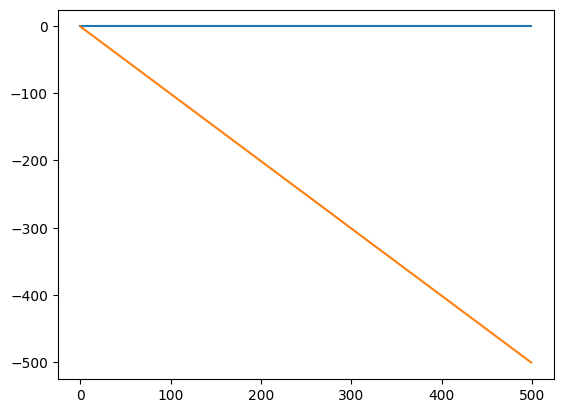

'rl-video-episode-0.mp4'

'rl-video-episode-1.mp4'

Total rewad: -500.0


In [37]:
import gnwrapper
import matplotlib.pyplot as plt

env = gnwrapper.Monitor(gym.make("Acrobot-v1"))

observation = env.reset()
total_reward = 0
r = []
tr = []

while True:
    action, _states = model.predict(observation)
    observation, reward, done, info = env.step(action)
    total_reward += reward
    r.append(reward)
    tr.append(total_reward)
    if done:
        env.reset()
        break

x = [i for i in range(len(r))]
plt.plot(x, r)
plt.plot(x, tr)
plt.show()
env.display()

print(f"Total rewad: {total_reward}")